# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the
beautiful Scikit-Learn library

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm/estimator and use it to make predictions on our data
4. Evaluation a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!
   

In [17]:
what_were_covering = ['0. An end-to-end Scikit-Learn workflow',
                      '1. Getting the data ready',
                      '2. Choose the right estimator/algorithm for our problems',
                      '3. Fit the model/algorithm and use it to make predictions on our data',
                      '4. Evaluating a model',
                      '5. Improve a model',
                      '6. Save and load a trained model',
                      '7. Putting it all together!']

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Sickit-Learn workflow

In [1]:
# 1. Get the data ready
import numpy as np
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
# We are going to use the features age, sex, cp, ..., thal to try and predict the target, which is one or zero heart disease or not.
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)
# X is kind of the features matrix, which is esentially these columns (age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal)
# and Y will be this column (target)

# we want every column except the target column

# Create y (labels)
y = heart_disease["target"]

In [18]:
# 2. Choose the right model and hyperparameters
# Well, our problem is classification because we want to classify wheter someone has heart disease or not

# Hyper parameters are like dials on a model that you can tune to make it better or worse
from sklearn.ensemble import RandomForestClassifier
# Random Forest is just a Clasification Machine Learning model.
# So it's capable of learning patterns and data and then classifying a sample a.k.a row is one thing or another thing
# and so we'll instatiate that class (RandomForestClassifier) using CLF which is short for classifier scikitlearn
clf = RandomForestClassifier(n_estimators=100)

# We'll keet the default hyperparameters
clf.get_params()

# So this is the hyperparameters, all the little knobs (perillas, reostatos, diales) on our Machine Learning model, 
# random forest classifier

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
# 3. Fit the model to the data
# So, first of all, we need to train our model on training set and test it on a test set
from sklearn.model_selection import train_test_split
# We need to split our data into training and test and we can do that with SKLEARN TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Essentially what this is going to do is split our data from X and y into X train, so training data
# y train, X test and y test. So testing data
# So we fit the model with the training data and we evaluated and see what it has learned on test data
# So data it has never seen before 
# test size=0.2 means that 80% of the data will be used for training because it's 0.2 because test size
# because test size is going to be 20%

# So if we have 1000 rows, 800 of them would be used for training and 200 of them would be used for testing

In [26]:
clf.fit(X_train, y_train)
# Hey, classification model, RandomForest, find the patterns in the training data.

RandomForestClassifier()

In [27]:
# Now, our model is fit to the data.
# So, what can we do now? 
# Well, we can make a prediction, so let's do that
# Make a prediction
y_label = clf.predict(np.array([0,2,3,4]))
# We can only make predictions on arrays that look like X_train
# because that is what our model has learned

C:\Users\Martin\Desktop\ml-course\sample-project\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [28]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2


In [29]:
# So, does this np.array([0, 2, 3, 4]) look anything like an X_train row? No, not at all
# but what does look like that is X test
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2


In [30]:
# So what we can do is making predictions on x test
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [35]:
y_test

133    1
238    0
254    0
35     1
214    0
      ..
237    0
252    0
112    1
128    1
89     1
Name: target, Length: 61, dtype: int64

In [36]:
# 4. Evaluate the model on the training data and test data
# This is where we evaluate how good the predictions are or how well the machine learning model
# we've just trained, our random forest classifier has done learning on the training data
clf.score(X_train, y_train)
# Devuelve la precisión media en los datos de prueba y etiquetas dados. 

1.0

In [39]:
clf.score(X_test, y_test)

0.9016393442622951

In [40]:
# So what has happened here?
# Well, the model has found patterns in the training data so well that it's got 100%
# why? because it got trained on the features X_train as well as the label  y_train
# So it had the chance to correct itself if it got something wrong.

# but it perfroms at 90.16% accuracy, which means that it gets 9 out of 10 predictions correct
# on the test data because it's never seen that data. 
# because it's never seen that data (X_test) nor has it even seen the labels (y_test)

In [42]:
# So there are some more metrics that we can use rather than just accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))
# it takes the y_test and y_preds and compares our true labels versus our predictions

              precision    recall  f1-score   support

           0       0.84      0.91      0.88        23
           1       0.94      0.89      0.92        38

    accuracy                           0.90        61
   macro avg       0.89      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [43]:
# So what this shows us is some classification metrics that compare the test labels to
# the predictions labels that we made with our model, y_preds = clf.predict(X_test)
# using the predict function

In [44]:
confusion_matrix(y_test, y_preds)

array([[21,  2],
       [ 4, 34]], dtype=int64)

In [45]:
accuracy_score(y_test, y_preds)

0.9016393442622951

In [47]:
# 5. Improve a model
# try a different amount of n_estimators, which is one of the hyper parametrs, a.k.a dials on our machine learning model
# that we can tune to try and improve it
np.random.seed(42)  # we start with a seed so that our results are replicable
for i in range(10, 100, 10):   # creamos un for que relice 10 iteraciones, de 10 a 100, con un paso de 10 en cada iteracion
    print(f"Trying model with {i} estimators...")    # y vamos ajustando el hiperparámetro con saltos de 10
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)    # hasta encontrar el valor en el que la exactitud del modelo sea la mas alta
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")    # posible
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 20 estimators...
Model accuracy on test set: 78.69%
 
Trying model with 30 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 40 estimators...
Model accuracy on test set: 88.52%
 
Trying model with 50 estimators...
Model accuracy on test set: 85.25%
 
Trying model with 60 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 70 estimators...
Model accuracy on test set: 81.97%
 
Trying model with 80 estimators...
Model accuracy on test set: 90.16%
 
Trying model with 90 estimators...
Model accuracy on test set: 85.25%
 


In [48]:
# if we would look back through this, you would sat that the best model with the best accuracy
# if we go back is 80 estimators
# con 80 estimadores la exactitud sobre los datos de test es la mas alta (90,16%)

In [49]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))
# write binary

In [54]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
# read binary
loaded_model.score(X_test, y_test)

0.8524590163934426

In [56]:
# and finally we saved a model and reloaded it, and it got the same score as out most recently trained model, which was 90
# estimator and got and accuracy of 85.25%
# n_estimators is a parameter in RandomForestClassifier

In [57]:
import sklearn
sklearn.show_versions()


System:
    python: 3.12.8 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:48:34) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\Martin\Desktop\ml-course\sample-project\env\python.exe
   machine: Windows-11-10.0.22631-SP0

Python dependencies:
      sklearn: 1.5.1
          pip: 24.2
   setuptools: 75.1.0
        numpy: 1.26.4
        scipy: 1.14.1
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.10.0
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 6
         prefix: mkl_rt
       filepath: C:\Users\Martin\Desktop\ml-course\sample-project\env\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 12
         prefix: vcomp
       filepath: C:\Users\Martin\Desktop\ml-course\sample-project\env\vcomp140.dll
        version: None


In [59]:
# clase 109: desintalar e instalar paquetes para que scikit learn tenga las dependencias con los numeros de versiones adecuadas de numpy, python, scipy
# y pueda funcionar bien. esto removera los warnings. https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-pkgs.html

# make sure that your dependencies all work with each other
# when you are experiencing warnings there's a couple of ways you can deal with them
# You can use the warning packages and you can either ignore them hitting 
# import warnings
# warnings.filterwarnings("ignore")
# but sometimes warnings can be helpful, so maybe you want to reset it back to default and then the warnings will show up as they come in

# And then if you figure out maybe you need to upgrade or change some of the dependencies, the packages, that you are using within Conda
# you can do that.. So managing packages in the Conda Documentation, that0s where you want to go, and if you run:
# conda update biopython or conda update scikit-learn and it doesn't work, it may be because some of the other packages, the other tools
# that you are using in Conda are using different version numbers and we saw that in here before when we checked the version of Python
# that we were 3.7 which was INCOMPATIBLE with version 0.22 of scikit learn (yo estoy usando la version 1.5.2 pero en el ejemplo del curso,
# la version de sckikit learn que instaló Conda es incompatible con la versión que tenia instalada de Python.. en resumen, hay que ver
# qué versión de las dependencias tienen que ser, para que scikit-learn funcione bien, hay que desinstalar las que tengan numeros que esten
# fuera de los rangos requeridos e instalar versiones que esten dentro de los rangos especificados por scikit learn; es decir, rearmamos el
# entorno de trabajo pero con las versiones correctas de las bibliotecas, para que todo funcione correctamente)

# conda uninstall packages_you_want_to_remove
# conda install package=number_of_version, for example, conda install scikit-learn=1.5.2

# Check the documentation, try it out, see if it works, and then second of all, if it's not working:
# uninstall the package that is broken and reinstall it

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels (usually 'X' & and 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Coverting non-numerical values to numerical values (also called feature encoding)

In [6]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# in this case, we want to use the feature columns X (age, sex,..., thal) to predict Y (the label target)
X = heart_disease.drop("target", axis=1)

# axis=1 means the column axis, so we are eliminating the target column in this step
X.head()
# So X is now going to be every single column except for target

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [11]:
# Now the next thing we have to do is split data into training and test sets

# So in Machine Learning, on of the most fundamental principles is NEVER EVALUATE OR TEST YOUR MODELS ON DATA THAT IT HAS LEARNED FROM,
# which is why we splitted it into training and test sets 

# So Scikit-Learn has a convenient function for allowing us to do that

In [12]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Now, when we call tran_test_split, it's going to return four different values

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Let's check out the shape of the matrices, because remember, our data here (X_train) is really just a matrix in a dataframe or 
# a numpy ndarray in a dataframe.

((242, 13), (61, 13), (242,), (61,))

In [15]:
X.shape[0] * 0.8

242.4

In [16]:
242 + 61

303

In [17]:
len(heart_disease)
# so we have 303 samples total, and 80% are going to be training data for the machine learning model.

303

## 1.1 Make sure it's all numerical

So if we have our car sales data and we have Makes like Toyota, we have colour, etc., etc., a Machine Learning
can't understand Toyota, can't understand Honda, can't understand red. We have to turn these into numbers.

In [18]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [20]:
# and now we're going to figure how many there are
len(car_sales)

1000

In [21]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [22]:
# Make and Colour are objects because they are strings and they are categories,
# wehreas these (Odometer (KM), Doors, Price) are numerical values.

In [23]:
# Now what we have to do because this section is Make sure it's all numercias, is
# before we can run a Machine Learning model, we have tod conver this (Make & Colour)
# into numbers.

In [26]:
# Split the data into X and y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# having the strings of characters make and colour and the amount of kilometers it mightn't be useful to predict the price
# Maybe not, but i probably need a little bit more information. The same probably goes with our Machine Learning model.

# We want to use the X to predict the Y.

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [27]:
# Build machin learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Now, this random forest regressor is the same as a classifier random forest, but this time
# it can predict a number

ValueError: could not convert string to float: 'Toyota'

In [28]:
# What does it happen? our Machine Learning can't deal with strings so we have to convert them to numbers so that we can build the model

En Machine Learning, un Random Forest es un conjunto de árboles de decisión. La diferencia entre un clasificador y un regresor de Random Forest radica en el tipo de tarea que realizan:

* Clasificador de Random Forest: Se utiliza para problemas de clasificación, es decir, cuando se quiere predecir categorías o clases. Cada árbol en el bosque "vota" por una clase, y la clase con más votos es la predicción final.

* Regresor de Random Forest: Se utiliza para problemas de regresión, donde el objetivo es predecir un valor continuo. En este caso, cada árbol predice un valor numérico, y la predicción final es el promedio de las predicciones de todos los árboles.

Ambos aprovechan la diversidad de los árboles individuales para mejorar la precisión y reducir el sobreajuste.

In [33]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [34]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]    # so we've got 3 categorical features
one_hot = OneHotEncoder()                             # and now we are going to make this little variable. we're going to take advantage of
                                                      # the OneHotEncoder class that we have imported. So we'll instantiate that there
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough") # and we're going to make a little variable called transformer.
                                                           # and then this one is going to use the column transformer.
                                                           # this is going to accept a list of tuples with a name. So in this case, we'll call it one_hot
                                                           # and then we'll pass the actual transformer that we want to use (one_hot).
                                                           # and then we are going to pass the list of features we would like to transform
                                                           # categorical_features. and the we're going to pass one final parameter called remainder.
transformed_X = transformer.fit_transform(X)     # and then we're going to have a little variable here called transformed_X
                                                 # which is basically going to be the version of our X data converted into numbers.
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [43]:
pd.DataFrame(transformed_X)

# But what has happened is that because we've told Scikit-Learn: hey! Make, Colour and Doors are categories
# what the code in the last cell has done has transformed it, specifically OneHotEncoder. 

# So now we've converted the Make, Colour and Doors columns into OneHotEncoded variables, but the Odometer column (12),
# the numbers are actually the same still. So the Odometer column hasn't been changed. The reason why Make, Colour 
# and Doors column have been changed is because we define them in the instruction: categorical_features = ["Make", "Colour", "Doors"] 

# 1. We instantiated a OneHotEncoder: one_hot = OneHotEncoder()
# OneHotEncoder() encodes categorical features as a one-hot numeric array.

# 2. then we've created a transformer using the ColumnTransformer(): 
# transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder="passthrough")
# So basically this is saying: Hey, ColumnTransformer, take the OneHotEncoder and apply it to the categorical features
# and for the remainder columns that you find pass trough, don't do anything to those.

# 3. And then what we've done is created transformed_X and fit our transformer, so fit transform, to our X data:
# transformed_X = transformer.fit_transform(X)     
# and now, transformed_X is all numerical.

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [45]:
# So what we've done is we've encoded the different parameters of each sample, so Honda, White and numbers of doors
# into zeros or ones. So now the beautiful thing is our data is all numerical!

# So what can we do? 
# Well... we should be able to fit a model.

In [46]:
# there's another way of doing this
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [47]:
# Let's try and refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
model.score(X_test, y_test)

0.3235867221569877

In [50]:
# If you were to look at this data here (X) and you were trying to use this to predict the car's price
# it will probably be pretty hard. So maybe the model has found some patterns, but they just weren't that
# great because there wasn't too much information about each sample. We can see the metrics later

The important thing, the point here is that we have converted our model, our data stored from being
non numerical to completely numerical and that has allowed us to fit a Machine Learning model on it.

In [51]:
# In this section, we're going to figure out what can we do when we've got missing value.

### 1.2 What if there were missing values?
There's to main ways to deal with missing data:
1. Fill them with some value (also know as imputation).
2. Remove the samples with missing data altogether

In [52]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [53]:
car_sales_missing.isna().sum()     # it detects missing values. and this is going to return how missing values there are.

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [62]:
# in the Make column there are 49 missing values, in the color column there are 50 missing values, ..., and so on.

# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [64]:
# Let's try and convert our data to numbers
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]    
one_hot = OneHotEncoder()                             
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough") 
transformed_X = transformer.fit_transform(X)     
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

In [ ]:
# It doesn't work because input contains NaN values (hay celdas vacias, faltan datos)

So what we have to do is before we cane ven convert our data into numbers we have to do something with this missing values
So let's see how we do that.. There is a couple of ways:

the first one is that we can fill missing data with Pandas

In [66]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

#### Option 1: Fill missing data with Pandas

In [67]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour column"
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

# What we might do is any categorical column we'll fill it with a missing string,
# and the others, like numericals, we might just fill it with the mean of the column

# if there are categorical you might fill with with empty string
# and a numerical column, you might fill it with the mean like the average of the column
# like the missing values will have the average of that column.

# car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing"), en el futuro usar esto

C:\Users\Martin\AppData\Local\Temp\ipykernel_17208\1493532043.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
C:\Users\Martin\AppData\Local\Temp\ipykernel_17208\1493532043.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [68]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [70]:
# Wonderful! so all of the feature columns (Make, Colour, Odometer (KM), Doors) are all full of values except for the Price

# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

# it will remove the rows in the df that doesn't have the Price value (we are loosing information here)

In [71]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [72]:
# Beautiful. So we don't have missing values in our DataFrame anymore.
len(car_sales_missing)

950

In [73]:
# We had 1000 values at the start. now we have 950 .
# We have lost 50 samples at the sacrifice of filling up all the data and removing any samples
# that don't have a label a.k.a price column

In [74]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [76]:
# Let's try and convert our data to numbers
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]    
one_hot = OneHotEncoder()                             
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough") 
transformed_X = transformer.fit_transform(car_sales_missing)     
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [79]:
# we can replicate what we have done here, purely with Scikit-Learn

### Feature scaling:
Feature scaling is a transformation that is utilized to make sure all your numercail data is on the same scale.
There are two main types of feature scaling: Normalization and Standarization. (class number 115)

### Option 2: Fill missing values with Scikit-Learn:

In [81]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [82]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [83]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [84]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [87]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# SimpleImputer class does imputations, find values with NaN and fill it with a string or a number. it helps us fill missing values
# Column transformer class allows us to define some kind of transformer and then apply it to whichever columns that we want to use it on.


# Fill caregorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value='missing')    # we're calling the class we have imported in the first line
# Hey, run over the categorical values of categorical (cat), for every value keep your strategy constant and the fill value
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
# "keep the strategy constant, so for every missing cell, do the same thing and fill it with 4"
num_imputer = SimpleImputer(strategy="mean")     # if you find a missing value, fill it with the mean of the numerical column
# and then we define some imputers.. and Remember, imputers are just filling the missing data; 
# using simple imputer class, which takes strategy and a fill value. if the strategy is constant we have to pass it a fill value
# saying: Hey, go to the categorical columns, constantly fill them, if you find a missing value, just fill them with the string "missing"


# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]


# Create an imputer (something that fills missing data)
# imputation <-> find a missing value & fill it up with something or calculate something to fill it with
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])
# and the we've used the column transform class, which is what we importend and we created an input to,
# passing the imputations we wanted to do "("cat_imputer", cat_imputer, cat_features)", etc. or the transformations we want to do
# le paso el nombre del imputer, le paso el nombre de la variable en donde esta almacenado y la columna en la que quiero aplicarlo)
# So these are the names ("cat_imputer"), 

# ColumnTransformer it takes a list of multiple different transformers, and now within the list we have, tuples of the name, the
# imputer we want to use and the features that we want to change

# So this one ("cat_imputer") is going to use cat_imputer on the categorical_features
# "door_imputer" is going to use door_imputer on the door_feature
# "num_imputer" is going to use num_imputer on the num_features

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X
# and then, once our transformer is defined, we create a new variable called filled_X
# and we are going to use our imputer and fit transform on our X data to fill up the values of X.

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [88]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [89]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [90]:
# And now we have no missing values, thanks to this bunch of code that we have written before (the SimpleImputer + ColumnTransformer)
# We should be able to convert car_sales_filled DataFrame into numbers

In [91]:
# Let's try and convert our data to numbers
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]    
one_hot = OneHotEncoder()                             
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough") 
transformed_X = transformer.fit_transform(car_sales_filled)     
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [94]:
# Now we've got out data as numbers and filled (no missing values) and it's all numerical
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)    # Hey random forest regressor model, find the patterns between X_train & y_train
model.score(X_test, y_test)    # Now evaluate those patterns that you found on this test data set

0.21990196728583944

In [97]:
# it score worse than the Regressor we obtained in the previous section,
# it doesn't perform really well because it only has 950 samples. son muy poquitas muestras
len(car_sales_filled), len(car_sales)
# That's a big pardigm of Machine Learning.. most of the time if you have more data, usually
# a Machine Learning model is able to find better patterns. And so that's kind of what happened here
# it's because we dropped the samples that don't have labels, our model hasn't been able to find as
# many patterns, even though we only removed 50 out of 1000 samples.

(950, 1000)

Most datasets you come across won't be in a form ready and immediately to start using with machine learning models
and some take (requires) a bit of preparation than others. And so mosy of the time what you'll have to be doing is
your data will have to be numerical and it can't have missing value.

And so the process of filling missing values is called imputation.

And the process of turning your non numerical values into numerical values is referred to as feature engineering or
feature encoding

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:

* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - prediction a number (such as the selling price of a car)
  
If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, \
refer to the sklearn machine learning map https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine learning model for a regression problem (predicting a number)

Let's use the California housing dataset from the documentation of Scikit-Learn: https://scikit-learn.org/1.5/datasets/toy_dataset.html
this website has Toy datasets and Real world data sets, that are like a small data set that you can practice on. We're using this Real world dataset: https://scikit-learn.org/dev/modules/generated/sklearn.datasets.fetch_california_housing.html

In [5]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
# we want to use the features to predict the target
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
# it receives a dictionary, the data, and it converts it into a dataframe
housing_df
# we have 20000 samples. we need the house value, which is the target variable 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
# we add the target variable to the data frame
#housing_df["MedHouseVal"] = housing["target"]     # we are going naming target instead of 
housing_df["target"] = housing["target"]   
housing_df.head()
# what we're trying to do here is to use this values (all features) to predict the MedHouseValue# 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


MedInc is median income in a block group.

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000)

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit
for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

In [9]:
housing_df = housing_df.drop("MedHouseVal", axis=1) # para eliminar columna
housing_df
# So what we're trying to do here is use these values (MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude), the features,
# to predict this value MedHouseVal, the target variable.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


So we're trying to use a small area of California and some statistics or some attributes about that area
to predict the median house value expressed in hundreds of thousands of dollars.

In [22]:
# Import algorithm/estimator (we go through the steps of the skl map and choose the algorithm)
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]    # median house price in $100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440131

In [23]:
# Now, what does this value mean to us?
# the docstrings says (shift+tab): Return the coefficient of determination of the prediction.

# what is the coefficient of determination?
# The coefficient of determination, also known as R-squared, is a statistical measure that indicates
# how well a model fits a set of data. It's used in regression analysis to determine how well a model
# predicts an outcome, or how well the regression line approximates the data.

# The coefficient of determination is a statistical measurement that examines how differences in one
# variable can be explained by the difference in a second variable when predicting the outcome of a
# given event. This coefficient is more commonly known as r-squared (or r2). It assesses how strong the
# linear relationship is between two variables and it's heavily relied upon by investors when conducting
# trend analysis.

# Esentially, is taking the relationship between the feature variables and the target variable
# and it's saying how predictive, using our current model, how predictive is our model given this features

# el coeficiente de determinacion es una metrica estadistica que examina cómo las diferencias en una
# variable (target) pueden ser explicadas por las diferencias en una segunda variable (features) cuando
# estamos prediciendo la salida de un evento dado. devuelve qué tan predictivo es este modelo 
# (qué tan bien aproxima) dadas estas caracteristicas/ estos rasgos.

# how much is able to predict the target variable? es capaz de acertar aproximadamente 57,58 veces de cada cien
# la exactitud del modelo no es muy buena que digamos pero es una primera solución posible.

# how predictive are these features of this target value.. that's the coefficient of determination

In [ ]:
# how might we improve the accuracy value?
# well, one way would be to add more data.
# another way would be, choosing a different model and try it out (see the scikit learn map)
# se puede ajustar parametros en este algoritmo?

In [ ]:
# READ THE DOCUMENTATION of machine learning algorithm clicking on the green boxes in the sklearn map

What if `Ridge` didn't work or the score didn't fit our needs?

Well, we could always try a different model...

How about we try an ensemble model (an ensemble is a combination of smaller models to try and make better predictions\
than just a single model).

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html



In [9]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8065734772187598

In [11]:
## 2.2 Picking a machine learning model for a classification problem
from sklearn.datasets import load_iris
data = load_iris()
data.target[[10, 25, 50]]

array([0, 0, 1])

In [12]:
list(data.target_names)

['setosa', 'versicolor', 'virginica']

### 2.2 Choosing an estimator for a classification problem

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [4]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
# Each row is a patient, so each sample is a patient,
# each column or each feature is a health attribute of that particular patient,
# and the target, one or zero, is whether that patient has heart disease or not.
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

LinearSVC es una clase en la biblioteca **scikit-learn** de Python que implementa un clasificador de máquinas de soporte vectorial (SVM, por sus siglas en inglés) para problemas lineales. A diferencia de SVC, que también forma parte de scikit-learn y puede manejar problemas no lineales utilizando el kernel trick, LinearSVC está diseñado específicamente para resolver problemas de clasificación binaria o multiclase con un modelo lineal.

**Características principales:**

1. **Modelo Lineal:** LinearSVC encuentra un hiperplano en el espacio de características que separa las clases objetivo. Si los datos son linealmente separables, este hiperplano divide perfectamente las clases.

2. **Optimización eficiente:** Utiliza el algoritmo de optimización __liblinear__, que es más rápido y eficiente para grandes conjuntos de datos que otros enfoques como los basados en kernels.

3. **Regularización:** Implementa regularización L1 o L2 para controlar el sobreajuste del modelo.

4. **Clasificación multiclase:** Utiliza el esquema one-vs-rest (OvR) para problemas multiclase.

**Parámetros principales:**

**C:** Controla la regularización. Un valor más alto de C da prioridad a minimizar el error de clasificación (menos margen), mientras que un valor más bajo busca un margen más amplio (mayor regularización).\
**penalty:** Tipo de regularización, puede ser 'l2' (por defecto) o 'l1'.\
**loss:** Función de pérdida utilizada, como 'hinge' (pérdida de bisagra) o 'squared_hinge' (pérdida de bisagra cuadrática).\
**dual:** Indica si se utiliza la formulación dual del problema. Para datos con muchas características y pocas muestras, se recomienda dual=False.

In [18]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Linear SVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the linearSVC
clf.score(X_test, y_test)

# Score returns the mean accuracy on the given test data and labels.
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

0.8688524590163934

In [19]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [ ]:
# there's only two clases, ones or zeros, does someone have heart disease or not?
# So it's a binary classification problem, where Binary means one or the other

# And our model is recibing a score of 0.87
# Our model is operating at 86.88% of accuracy

# This is saying, hey, without improving our model by tuning the hyper parameters, this is the best accuracy we can obtain.
# we should tune the parameters or select another algorythm of classification. 

In [21]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Linear SVC
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

**If you have structured data, a.k.a tables or data frames, use ensemble methods such as a Random Forest**

Tidbit:

    1. If you have structured data (table, matrixes, dataframes), use ensemble methods.
    2. If you have unstructured data (images, audio, or text or sth like that), use deep learning or transfer learning

In [24]:
heart_disease
# reducing the time between experiments.. define the problem, load the dataset, choose algorythm in the SKL map depending on the type of problem
# read the documentation of the algorythm and try to applicate the example code applied to your problem, using the framework we have been working on
# reutilize the codes that we wrote before applying the new classificators regressors and see how can i modify the parameters in order to improve the 
# accuracy of the model in the prediction of the class or numerical value of the target variable.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Finding patterns in data and then using those patterns to make predictions of the future data\
a model hasn't seen before

## 3. Fit the model/algorithm on our data and use it to make prediction

### 3.1 Fitting the model to the 

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [9]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [10]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [11]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()` function 
2. `predict_proba()`

In [12]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work
# Predict class for X.

C:\Users\Martin\Desktop\ml-course\sample-project\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [14]:
# if we want to make predictions, the data that the function predict recieves as an argument has to be in this shape

In [15]:
clf.predict(X_test)
# this are our predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [17]:
np.array(y_test)
# this is the true values

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [18]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [19]:
# We're making prediction here with our model, and we're comparing the predictions to the ground truth labels (y_test),
# so I'm comparing it to the truth labels from our original data set.

In [23]:
clf.score(X_test, y_test)
# Return the mean accuracy on the given test data and labels.

0.8524590163934426

In [21]:
# So what we have calculated is the accuracy, or we are comparing how well the model did

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)
# Accuracy classification score. (press Shift + tab to read the doc string)

0.8524590163934426

In [ ]:
# the same thing.. three different ways of doing the same thing

In [27]:
# In our case, our y_true labels or the labels that came with our dataset are in the test data (y_test)

# So that's one way to make predictions with our classification model.

Make predictions with `predict_proba()`

In [37]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])
# Probability estimates
# the returned estimates for all classes are ordered by the label of classes
# A class would be "not heart disease" and the other class would be "heart disease"

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [40]:
# el arreglo mas grande contiene cinco arreglos mas pequeños de dos numeros (es una lista que contiene 5 elementos de tipo lista)
0.89 + 0.11

1.0

In [38]:
# Let¿s predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

pero este solo tiene un arreglo de 5 numeros

if we look at this, let's line up with sample one of clf.predict (0, the first element of the array)\
with the first array of clf.predict_proba [0.89, 0.11], we can see that the numer on the left a.k.a\
0.89 (not heart_disease) is far greater than 0.11 (heart_disease)

now, let's see if there is a trend here.. We go to here, index 1 of clf.predict (1), corresponds to\
index one of clf.predict_proba [0.49, 0.51], the value on the right is bigger, and now, this is a one\
(the index 1 of clf.predict is 1).

now if we go to index two, a.k.a label 1, ok the value on the right of predict_proba index 2 is bigger again\

and the we've got 0 in clf.predict, the value on the left of clf.predict_proba is bigger.

and then again, for the final value, clf.predict is 1, and the value at index 1 of clf.predict_proba\
[0.18, 0.82] the value of index 1 (0,82) is greater.

So what this is, is it's making predictions on the same data, but instead of just returning the label,\
it's returning the probability of that label **being true**

In [39]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


So what predict_proba() is doing is going: Hey, i'm looking at the first five rows of these\
X_test. So X_test, i'm looking at these samples. What i've learned on the training data,\
if i look at this sample here, i'm giving it label zero (1st element of clf.predict),\
so "not heart disease" and i'm predicting that label zero with a probability of 0.89\
first element of the first list of predict_proba result array([[0.89, 0.11], -> 0.89.

So what it's saying is: this sample "179	57	1	0	150	276	0	0	112	1	0.6	1	1	1"\
it has 0.89 probability of the label being zero.\

and the next sample here: "228	59	1	3	170	288	0	0	159	0	0.2	1	0	3" which gets\
the label one clf.predict, index 1, second element, label 1. (predice que la muestra 228,\
la etiqueta para esa combinacion de features deberia ser 1 (heart disease)) has a 0.51\
probability of the label being one.

So it's pretty damn confident that this: "246	56	0	0	134	409	0	0	150	1	1.9	1	2	3"\
sample is not heart disease, [0.84, 0.16],, so that's way it labels y_pred with zero.

`Predict()` will give you a single label for each sample, whereas `predict_proba()`\
returns the probabilities of a classification label.


the closer to one the probability, the more sure your model is that the prediction\
it's made is a certain class

In [41]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()` can also be used for regression models.

In [10]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
from sklearn.ensemble import RandomForestRegressor    # we're trying to predict a number, that's a regression problem
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # OJO CON EL ORDEN DE LAS VARIABLES DE SALIDA  

# Create model instance
model = RandomForestRegressor()    # Scikit-Learn already have great default parameters,
                                    # if they don't work really well you can always alter their values
# We have created the model. Now we have to fit it to the data.
# Hemos creado el modelo. Ahora tenemos que ajustarlo a los datos.

# Fit the model to the data
model.fit(X_train, y_train)    # entrenamos el modelo

# Make predictions. y realizamos predicciones
y_preds = model.predict(X_test)

In [18]:
y_preds[:10]
# are this predictions in the same formate as our target variable?
# because we want to compare apples to apples, they have to be measured in the same units

# So our predictions, we want them to be in the same format as the target.

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [22]:
# So let's have a look at some of the first ten target variables (the true values)
np.array(y_test[:10])    # it turns the Series y_test[:10] into a np array

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [23]:
# Okay, beautiful.. so this:

# array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
#        2.34323  , 1.66182  , 2.47489  , 4.8344779]) 

# looks quite similar to this:

# array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
#        1.575  , 3.4    , 4.466  ])

In [24]:
# How might we evaluate our model? Our models predictions, that is on the test data set
# Well we can compare them..
len(y_preds)

4128

In [25]:
len(y_test)

4128

In [27]:
# So that means there's one value for every test value.  
# there's one prediction our model has made for every test value.

Mean Absolute Error is the average difference between the predictid values and the true values.

In [28]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [29]:
# Ah beautiful.. because we are using MAE, this means that on average (mean is the same as average), on average,
# each one of our model predictions is 0.32 different to the actual test value.

# Now, of course, there may be some predictions that are more than this value. There may be some predictions
# that are less than this value, worse than the Y test value or different to the y_test value.

In [30]:
housing_df["target"] 

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluationg a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

1.  Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

I can read more about these here: https://scikit-learn.org/1.5/modules/model_evaluation.html

### 4.1 Evaluation a model with the `score` method

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y. Make the data
heart_disease = pd.read_csv("data/heart-disease.csv")
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
model = RandomForestClassifier(n_estimators=1000)

# Fit classifier to training data
model.fit(X_train, y_train)

# The haighest value for the .score() method is 1.0, the lowest is 0.0
model.score(X_train, y_train)

1.0

In [46]:
# always be skeptical of perfect metrics
# in this case the model obtained 100% of accuracy because it's had exposure to 
# all of the training featurs and all of the training labels

In [47]:
model.score(X_test, y_test)
# Remember, it hasn't seen the test samples yet.
# We want out model to be able to learn enough from the training features
# and the training labels to predict on samples it hasn't seen before
# that's the crux of machine learning. 

0.8688524590163934

In [ ]:
# the score of the model with the training set will generally be higher that the score with the test set

Let's use the `score()` on our regression problem

In [53]:
from sklearn.ensemble import RandomForestRegressor       # we are importing the regressor because we are predicting a number
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing    # Get California Housing dataset

housing = fetch_california_housing()

housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]   

# Setup random seed
np.random.seed(42)

# Create X & y. Make the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create regressor model instance
model = RandomForestRegressor(n_estimators=100)

# Fit classifier to training data
model.fit(X_train, y_train)

# Check the score of the model (on the test set) 
model.score(X_test, y_test)
# Return the coefficient of determination of the prediction.

0.8065734772187598

In [56]:
# Ok, we get 80.6% of coefficient of determination with this machine learning model 

# target variable (y) is dependent of the feature variables (independent variables, X)

# the default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0

In [55]:
y_test.mean()

2.0550030959302323

### 4.2 Evaluating a model using the `scoring` parameter

Is that model actually working? is it model actually learning something? could we use that to predict in the future?


In [27]:
from sklearn.model_selection import cross_val_score    # We've imported cross validation score from Scikit-Learn model selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y. Make the data
heart_disease = pd.read_csv("data/heart-disease.csv")
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=1000)

# Fit classifier to training data
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [28]:
clf.score(X_test, y_test)

0.8688524590163934

In [61]:
cross_val_score(clf, X, y)    # it takes our classifier, it takes X data and it takes y data (as arguments), not the test 
# it evaluates a score by cross-validation (shift + tab, to read the doc strings)

array([0.83606557, 0.90163934, 0.78688525, 0.8       , 0.76666667])

Now, what cross validation does is it does five different splits, so it'll use\
the first 20% as test set and it'll use the remaining 80% as a training set\
then, it will move here (0.2 of the data set) and it'll use the second 20%\
subset as a test set and it'll use the remaining 80% of the data as a training set\
and so on. And then again, and again, and again. (class number 129)

So what happens is that Cross Validation trains 5 different versions of the model,\
and then it evaluates that those model trained on each trianing data on five different\
versions of the test data.

So, what's the purpose of this?
Well, as you could imagine, if we're only training one model, it could be a lucky split\
like, Say this, 80% of rows say that a had whole bunch of information and the model\
was able to learn really well on this 80 rows (patients) and then it got a really good\
score on this test set (image of cross validation, first diagram). 

Is that a true reflection of how our model would understand the data or figure out the\
patterns in the data? Well, not really, right? because it's just luck, right?\
if we're just splitting the dataset randomly and somehow a bunch of easy patient records\
have gotten here and the model figured out certain patterns and it's gone over to here\
to this test data set and it's got an amazing score. We could be tricking ourselves.

We could be fooling ourselves into thinking that our model is far better than what it\
actually is.

So that's where Cross Validation comes into play. It aims to provide a solution to\
not training on all the datta and avoiding getting those lucky scores on just a single\
split of data.

So it will create five different splits. So no matter what, our model is going to be\
training on all of the data and evaluated on all of the data. And so this is why if\
we come back to see cross_val_score(X, y, cv=5):    # cv=5 is the number of k-folds

array([0.83606557, 0.90163934, 0.78688525, 0.8       , 0.76666667])

It's why it gives us back five diferent scores here.. 

So if we call the score parameter on only our X_test data and our y_test, it's going\
to give back one score. But if we call cross_val_score because we refer back to the\
graphic here, it's going to make five different splits. And remembers, five fold is just\
an arbitrary number, you could do 10 folds, you could do 3 folds, you could even do 100 folds\
But 5 fold is the default of the library, and it's usually pretty good depending on the size\
of your data. So we use 5 folds to demonstrate in here.

In [62]:
# it returned 5 different scores. We can take the average of this five scores

# We can even do ten folds. So this means it's just going to make ten different splits
# exactly the same as we've seen in the cross validation image on the right diagram.
cross_val_score(clf, X, y, cv= 10)   

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.9       ,
       0.83333333, 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [63]:
# and it returned 10 different scores. So you see here, this is a great example, 
# on split one it's got a score of 0.9, so that could be 90% which is higher than
# the previous result, but on a later split it's got something much lower 0.73

# And so what we do here is to figure out a more ideal performance metric or evaluation
# metric for our machine learning model, Is that we can take the average of these five 
# scores
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score= np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8688524590163934, 0.8215300546448088)

In [64]:
# Our single score is 0.86. But when we use cross validation, when we use five splits because cv=5
# we get a score of 0.82. So it's slightly lower. But in this case, if you are asked to report accuracy
# of your model, even though it is lower you'd prefer the cross validation metric over the non cross
# validation metric.

In [ ]:
# Default scoring parameter of classifier = mean accuracy
clf.score()
# Return the mean accuracy on the given test data and labels.

In [65]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)
# so we know that this 0.8215300546448088 is accuracy beause if scoring is None,
# it uses the default scoring parameter of our estimator. In our case, the scoring parameter 
# of classifier equals mean accuracy is accuracy

# When we have scoring set to None, it's going to use the default evaluation metric for
# cross validation on our classifier

array([0.83606557, 0.8852459 , 0.80327869, 0.8       , 0.76666667])

In [66]:
# Lo que hace Cross Validation es dividir el conjunto de datos en conjunto de entrenamiento y de
# prueba multiples veces, de forma tal que cada vez que realizamos esta acción a los conjuntos de
# datos de entrenamiento y de test se los llama splits.. y la idea es ir variando los datos que 
# utilizamos para realizar el conjunto de test, de modo de ir recorriendo todo el data set

# entonces hacemos esta division del conjunto de datos en entrenamiento y test varias veces, p. ej 10
# veces, y ajustamos el modelo de machine learning a cada uno de los diez conjuntos de entrenamientos
# y lo testeamos tambien diez veces. Entonces trabajando de esta forma estamos logrando:

# entrenar el modelo con todo el conjunto de datos y testea el modelo con todo el conjunto de datos
# y obtiene metricas de precision/exactitud para cada una de las splits, consecuentemente, podemos
# promediar estos valores y evaluar cuanto ha aprendido nuestro modelo de Machine Learning

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [61]:
# So what this is going to give back is because the default score parameter of our classifier is the main accuracy
# we can see this in the doc string of the calling to the method clf.score()
clf.score(X_test, y_test)
# """Return the mean accuracy on the given test data and labels."""

# This is what the cross_val_score is measuring here: array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333]), the main accuracy.

0.8032786885245902

In [69]:
np.mean(cross_val_score)
# this is going to give us the mean accuracy of our model and basically this comes out as a decimal

0.8248087431693989

In [71]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


In [73]:
# And what accuracy is actually saying is: Given a random sample, given a sample that a model hasn't seen before,
# how likely is to predict the right label/target (wether if the patient has heart disease or not) ?

# aproximately 8 times out 10 our model will predict the right label given a sample with the shape of X_train
# base on the original training data. So that's accuracy in a nutshell.

**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predicts 1 when truth is 1 (it predicts that a patient has heart disease when that is true) 
* False positive = model predicts 1 when truth is 0 (it predicts that a patient has heart disease when that's not true)
* True negative = model predicts 0 when truth is 0 (the model predicts that a patient doesn't have heart disease when he/she actually doesn't)
* False negative = model predicts 0 when truth is 1 (its predicting not heart disease when it actually is heart disease)

In [31]:
# Create X_test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)
# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [81]:
# we only want probabilities that the model has predicted for the positive class (prob that patient has heart disease, second element of the lists)
# y_probs => [0.58, 0.42] => 0.58 is the probability that the label is 0 and 0.42 is the probability that the label is 1, and so on for all of this 
# sample.. there are 61 samples.

# Esentially what we want is y probs positive
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]
# we are looking at the first ten samples

array([0.42, 0.84, 0.51, 0.22, 0.45, 0.9 , 0.71, 0.02, 0.9 , 0.54])

In [82]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.20689655, 0.24137931, 0.24137931, 0.27586207, 0.34482759,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.51724138,
       0.51724138, 0.55172414, 0.5862069 , 0.65517241, 0.72413793,
       0.79310345, 1.        ])

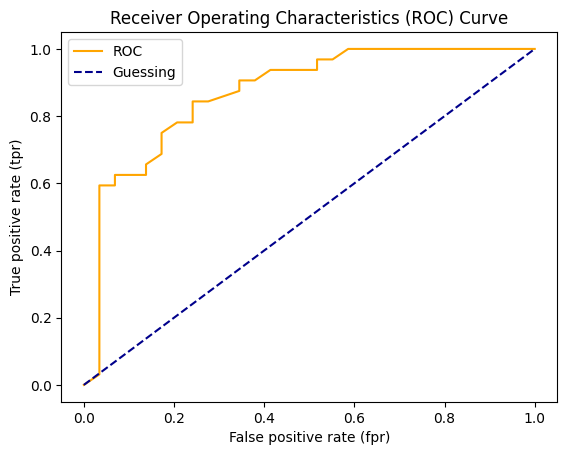

In [84]:
# we can plot this rate so it is more clear the meaning of the ROC curve. plotting the ROC curve will make a bit more sense

# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """ 
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1],[0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

# I might use the ROC curve as an example of how well the model is doing/performing

In [88]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

# AUC stands for Area Under Curve. Let's see the AUC score
# The area under the curve must be less than 1.0 because the curve doesn't increase in a step unit

0.8701508620689655

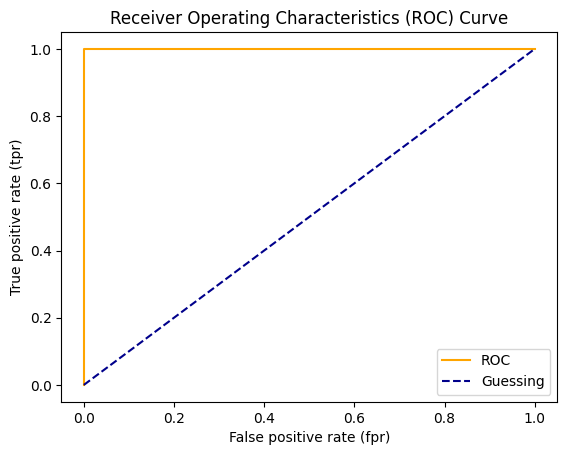

In [87]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [89]:
# So this is a perfect ROC curve. The area under the curve here is 1.0.
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

In a nutshell, what i should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

For more information on these metrics i can refer to the following resources:

ROC and AUC, Clearly Explained! by StatQuest
https://youtu.be/4jRBRDbJemM?si=rvfdQvFLS1cmsj5s

ROC documentation in Scikit-Learn (contains code examples)
https://scikit-learn.org/1.5/auto_examples/model_selection/plot_roc.html

**Confusion Matrix**

The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supossed to predict.

In essence, giving you an idea of where the model is getting confused.

https://scikit-learn.org/dev/modules/generated/sklearn.metrics.confusion_matrix.html

In [42]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)    # we'll make some predictions with our trained classifier, we'll predict on X_test

confusion_matrix(y_test, y_preds)    # it receives the true labels and predictions as arguments

# They are comparing the true labels with the predictions and giving us some insights on that comparison

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [43]:
# We've got an array of different numbers. Let's keep going, and how about we add some labels to this?
# So one way to do that is with the pandas.crosstab() method 

# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,23,6
1,6,26


In [44]:
# Because we're comparing the true labels (y_test) versus the predicted labels (y_preds)
# This is what the cross tab of the confusion matrix is showing us.
# So the rows are the actual labels and the columns are the predicted labels.

# So when the actual label is 0 and the predicted label is 0 we have 23 examples

# and then when the predicted label is 1 and the actual label is 1 we have 26 examples

And so the most ideal spot that we want values to be is on the diagonal (top left to bottom right).. why is that?\
Well, that would mean that the predicted label of our model 0 lines up wit the actual label of the truth values 0 (zero and zero)\
and same with one..

Now, this sample here, on the opposite diagonal (from top right to bottom left) there are the samples where our model is getting confused,\
these are erroroneus predictions, the incorrect classifications. In essense, is predicting a 1 where the actual label is a 0 and vice versa.\
Here it's predicting 0, where the actual label is a 1.

So we have the correct values in the main diagonal.


In [35]:
23 + 6 + 6 + 26

61

In [36]:
len(y_preds)

61

In [ ]:
# So the model has predicted 1 but the actual label is 0, so that's a false positive (it has classified incorrectly)
# And now we have a predicted label of 0, but the actual label is 1, there is 6 examples of that, so those are 6 false negatives.

# the diagonal of 6 is where our model is getting confused, a.k.a predicting 0 where the actual label was 1
# predicting 1 where the actual label was 0.

# We look here where the model got the samples right is on the main diagonal.

In [37]:
# Make our confusion matrix more visual with Seaborn's heatmap() function
# Seaborn is a visualization library that is built on top of matplotlib

# Installing seaborn
# option 1
# in another anaconda prompt type the following command
# conda activate C:\Users\Martin\Desktop\ml-course\sample-project\env
# conda install seaborn

# option 2:

In [38]:
# How to install a conda package into the current environment from a Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn
# sys es lo mismo que el path C:\Users\Martin\Desktop\ml-course\sample-project\env

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Martin\Desktop\ml-course\sample-project\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.12.31 |       haa95532_0         129 KB
    matplotlib-base-3.10.0     |  py312he19b0ae_0         9.4 MB
    seaborn-0.13.2             |  py312haa95532_0         714 KB
    ------------------------------------------------------------
                                           Total:        10.2 MB

The following NEW packages will be INSTALLED:

  matplotlib-base    pkgs/main/win-64::matplotlib-base-3.10.0-py312he19b0ae_0 
  seaborn            pkgs/main/win-64::seaborn-0.13.2-py312haa95532_0 

The following packages will be UPDATED:

  ca-certificates                

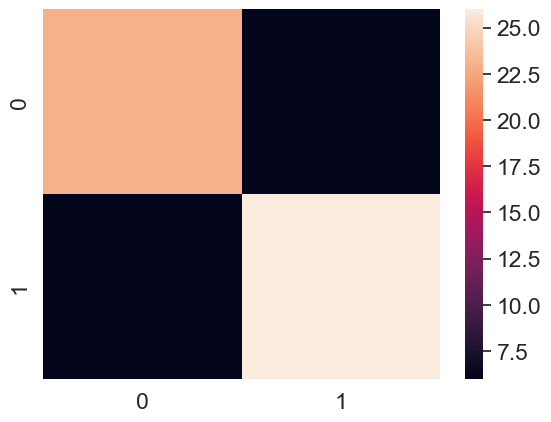

In [41]:
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Plot rectangular data as a color-encoded matrix.
conf_mat = confusion_matrix(y_test, y_preds)    # we pass it the test and predictions

# Plot it using seaborn
sns.heatmap(conf_mat);
plt.show()

### Creating a confusion matrix using Scikit-Learn

To use the new methods of creating a confusion matrix with Scikit-learn i will need Sklearn version 1.0+ https://scikit-learn.org/stable/install.html \
https://scikit-learn.org/dev/auto_examples/release_highlights/plot_release_highlights_1_5_0.html#sphx-glr-auto-examples-release-highlights-plot-release-highlights-1-5-0-py

In [48]:
import sklearn
sklearn.__version__
# updating sklearn (class 135)
# conda activate ./env 

'1.5.2'

In [49]:
clf

RandomForestClassifier()

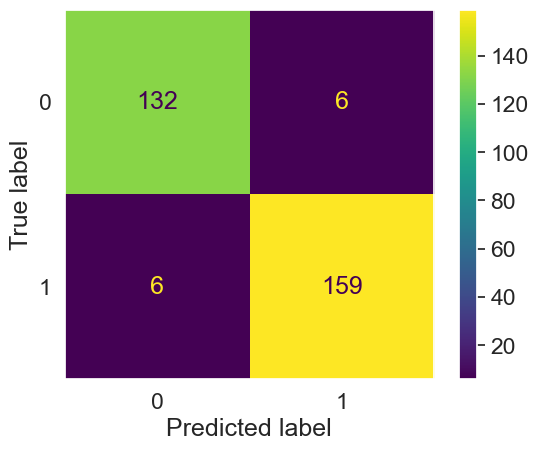

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)
plt.grid(False)
plt.show()

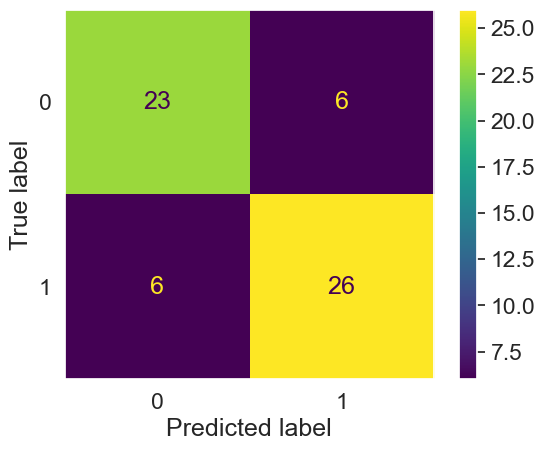

In [60]:
# Now the diference here is that from_predictions takes y_true and y_pred. So there's no estimator. So this means i have to have predictions ready to go,
# whereas in the other version, from_estimator i can create a confusion matrix without predictions ready. So it makes the predictions for me.

ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                         y_pred=y_preds);
plt.grid(False)
plt.show()

**Classification Report**

A classification report is also a collection of different evaluation metrics rather than a single one. So that' where the report comes from.
It's going to report back of a number of different parameters evaluation our classification model.

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [65]:
# We don't have class imbalances here, bercause we have relatively the same amount of class 0 and class 1.

# So if i do have class imbalances, i really want to check out my macro average.

# weighted avg and macro avg are quite similar because we have balanced classes.

In [66]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1    # only one positive case in ten thousand. 
                       # we want to detect it
disease_preds = np.zeros(10000)    # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds,
                                   output_dict=True))

C:\Users\Martin\Desktop\ml-course\sample-project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Martin\Desktop\ml-course\sample-project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Martin\Desktop\ml-course\sample-project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

 * **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
 * **Precision** and **recall** become more important when classes are imbalanced.
 * If false positive predictions are worse than false negatives, aim for higher precision.
 * If false negative predictions are worse than false positives, aim for higher recall.
 * **F1-score** is a combination of precision and recall.

In [69]:
# So this is a good example, where I want to use another metric other than accuracy. When i have a very large class imbalance

# So in our case, we have a massive class imbalance because in our original data set, disease_true, there is only one case where
# the label would be 1 and everything else is zero. We built a model that just predicts zero for every case, it represents a model that is biased.

# If we were to measure just accuracy on our model it comes out with an accuracy of 0.99 or in other words, 99%.
# Although the model achives 99.99% of accuracy, is the model still useful?
# that's why we use the other metrics such as the macro average, it's 0.5, like flipping a coin, that means our model is falling down here.

# On the precision, it's actually getting zero precision for class 1, which makes sense because it  didn't even predict class 1.

# And here, it's getting basically 100% on class 0 because it has only predicted class 0.

# So this is a use case scenario where i want to make sure that i'm using a wide spectrum of evaluation metrics for my classification model and
# not just accuracy.

# Refer to the documentation: https://scikit-learn.org/1.5/modules/model_evaluation.html

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation: https://scikit-learn.org/1.5/modules/model_evaluation.html READ IT

The ones we're going to cover are:
1. R^2 (r squared) or coefficient determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

the crux of evaluation it's comparing a model's predictions to what it should have predicted.

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For\
example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2\
value would be 1.

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing    # Get California Housing dataset

# Setup random seed
np.random.seed(42)

housing = fetch_california_housing()

housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]   

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [6]:
model.score(X_test, y_test)

# R squared is the proportion of the variation in the dependent variable (y) that is predictable from the independent variable (Xi)

0.8065734772187598

In [74]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [75]:
# Podemos esperar que y varie R_cuadrado unidades debido a las caracteristicas Xi 
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [76]:
y_test.mean()

2.0550030959302323

In [77]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
# numpy create a new array of length y_test, each sample with the value of the y_test mean.

In [80]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [81]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)
# if our model just predicts the mean y_preds = y_test_mean then we should get a r2_score of 0 because there wouldn't be variation in y.

0.0

In [84]:
# if my model is performing really poorly i'm going to get an r2_score of 0 or negative.

# The simplest model tat we could use on our test data, or even in our training data as well, would be that
# we just predict the target as the average of all the other targets. So that's the simplest ml ,,model"
# but the power of Random Forest is that it's able to achieve a model that gets r2_score of 0.8065, close to 0.81.
# A perfect model would get 1.0

r2_score(y_true=y_test,
         y_pred=y_test)
# if our model just perfectly predicted the test data, it'll get an r2_score of 1.0

1.0

So that's a quick way i can test my regression algorithm to see how well it's doing at predicting the target value from the features.

**Mean absolute (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your model predictions are.

In [8]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [21]:
df = pd.DataFrame(data={"actual values":y_test, 
                        "predicted values":y_preds}) 
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.220380,-0.412620
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


In [25]:
# the index is shuffled because we shuffled our y_test data

# MAE ysubg formulas and differences
np.abs(df["differences"]).mean()     # so that's the formula for our mean absolute error
# we calculate the difference between the actual values and the predicted values and then
# we take the mean

0.32659871732073664

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [43]:
# MSE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_true=y_test, y_pred=y_preds)
mse

0.2534678520824551

When we square differences, we're going to amplify values that are largel. be careful with this

Evaluating a model is comparing predictions to ground truth values.

In [44]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [45]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.head()

20046    0.000284
3024     0.088173
15663    0.005100
20484    0.127563
9814     0.200919
Name: differences, dtype: float64

In [46]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

C:\Users\Martin\AppData\Local\Temp\ipykernel_14920\3409892222.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16


In [47]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [48]:
# Calculate MSE with large rror
df_large_error["squared_differences"].mean()

0.2573437523766412

In [52]:
# it doens't change too much, altough we've introduced a large error
df_large_error.iloc[1:100,3] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,20.000000
15663,5.00001,4.928596,-0.071414,20.000000
20484,2.18600,2.543160,0.357160,20.000000
9814,2.78000,2.331760,-0.448240,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [53]:
df_large_error["squared_differences"].mean()

0.7334180712088106

### 4.2.3 Finally using the scoring parameter

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [57]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)    # If scoring=None, estimator's default scoring evaluation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [60]:
# beautiful, so we get five different values. So why is this? why do we have five different values? because we set cv = to 5
# Cross-validated accuracy
print(f"the cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

the cross-validated accuracy is: 82.48%


In [ ]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")

In [62]:
# Presision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [64]:
# If we split our data and tested using this subset 0.90322581 it maight perform far better than this one 0.74358974.

In [65]:
# Cross validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8085601538512754


In [67]:
# 0.8085 that's 0.1 worse than the best performing split and olmost 0.1 better than the wors performing split.

# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [69]:
# So it looks like our recall values, our model does better on recall. Because this 
# are quite close together. We see that in recall, the returned values are  all
# around 0.84, 0.87, 0.85 approximately. So all around 0.8, not as much variance between these values as the precision

In [70]:
# Cross validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let's see the `scoring` parameter being used for a regression problem

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing    # Get California Housing dataset

# Setup random seed
np.random.seed(42)

housing = fetch_california_housing()

housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]   

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)     # this step is not necessary here

RandomForestRegressor()

In [82]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)
# the higher this value, the better the model

0.6545458023124507

In [80]:
# Error absoluto promedio negativo
# Evaluamos el modelo con validación cruzada usando 'neg_mean_absolute_error'
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Imprimimos resultados
print("Puntuaciones de cada fold (MAE negativo):", cv_scores)
print("Error absoluto promedio (MAE):", -np.mean(cv_scores))

Puntuaciones de cada fold (MAE negativo): [-0.54174862 -0.4038151  -0.43660557 -0.47440105 -0.47225551]
Error absoluto promedio (MAE): 0.46576517044089155


In [77]:
# Error cuadrático medio negativo.
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Imprimimos resultados
print("Puntuaciones de cada fold (MSE negativo):", cv_scores)
print("Error absoluto promedio (MSE):", -np.mean(cv_scores))
# when we have a negative version of the error higher is better
# we have a variation from -0.54 to -0.34 and then -0.37.. but in the avg, the neg mse is approximately 0.43

Puntuaciones de cada fold (MSE negativo): [-0.54000377 -0.34819673 -0.37131676 -0.43595944 -0.46530725]
Error absoluto promedio (MSE): 0.4321567931765052


In [83]:
# the worst performing split -0.54000377
# the best performing split -0.34819673 (we want to maintain this number as close to 0 as possible)

In [79]:
# Coeficiente de determinación
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Imprimimos resultados
print("Scores de cada fold (R2):", cv_scores)
print("Promedio de R2:", np.mean(cv_scores))

Scores de cada fold (R2): [0.53256841 0.69919382 0.74056539 0.62372853 0.68025557]
Promedio de R2: 0.6552623439273416


## 4.3 Using different evaluation metrics as Skickit-Learn function

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/1.5/api/sklearn.metrics.html#module-sklearn.metrics

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
heart_disease = pd.read_csv("data/heart-disease.csv")
X = heart_disease.drop("target", axis=1)    # we'll drop the target on the first axis
y = heart_disease["target"]                 # asign target column of heartdisease df to y

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit model
clf = RandomForestClassifier(n_estimators=1000)
# Fit classifier to training data
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on test set")
acc_score = accuracy_score(y_true=y_test, y_pred=y_preds)
print(f"Accuracy: {acc_score*100:.2f}%")   # Return Accuracy classification score.
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")


Classifier metrics on test set
Accuracy: 86.89%
Precision: 0.8529411764705882
Recall: 0.90625
F1: 0.8787878787878788


In [90]:
pr_score = precision_score(y_true=y_test, y_pred=y_preds)
pr_score 
# Compute the precision. The precision is the ratio tp / (tp + fp) 
# where tp is the number of true positives and fp the number of false positives.

0.8529411764705882

In [91]:
recall_score = recall_score(y_true=y_test, y_pred=y_preds)
recall_score
# Compute the recall.

0.90625

In [92]:
f1_score = f1_score(y_true=y_test, y_pred=y_preds)
f1_score

0.8787878787878788

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error,  mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing    # Get California Housing dataset

# Setup random seed
np.random.seed(42)

housing = fetch_california_housing()

housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]   

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set:")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set:
R2 score: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


## 5. Improving a model

First predictions = baseline predictions. (here equals means 'often refers to')\
First model = baseline model

Once you've built your model and evaluted it, you have to improve your model.

There is two main ways:
From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we imporve our data? (for example, adding new features to our data-set to make it more informative)

From a model perspective:
* Is there a better model we could use? (if we use the sklearn map. for example, we build a clf using SVC, maybe we can use Ensemble Classifiers)
  https://scikit-learn.org/dev/machine_learning_map.html    If we start using a simple model, could we use a more complex one?
  (linear SVC is simpler that Ensemble classifiers complex.. SGD Classifier is simpler than kernel approximation complex) try sth more complex.
* Could we improve the current model?
  Now in this case, if the model we're using performs well straight out of the box, can we improve the hyper parameters of this model to make it even better?

Patterns in the data that our machine learning finds is often referred to as data parameters\
and the difference between parameters and hyper parameters is: a ML model seeks to find patterns in data on its own.\
So a machine learning model will find parameters in data on its won, whereas hyperparameters are settings in a model that you can adjust.

Hyperparameters vs. Parameters:

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [27]:
clf.get_params()
# adjusting hyperparameters is like adjusting temperature on our oven

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# we can adjust these hyperparameters to our model of ML so that it finds this patterns in the data
# a little bit better than what it does straight out of the box.

### 5.1 Tuning hyperparameters by hand

the hyperparameters get tuned on the validation split and then finally the model gest evaluated as normal on the test split

Let's make three sets, training, validation and test.

In [102]:
clf.get_params()
# So these are all the baseline parameters, a.k.a the settings on our model which we can adjust.

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [4]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labls vs. y_preds labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [7]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)     # it sample as many times as rows there are in the df and reasign it to heart_disease

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # we want 70% of the length of our data (we're going to slice the data-set) 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # that would be trainsplit because we want to index, we want the next 15%. 15% of data
X_train, y_train = X[:train_split], y[:train_split]    # X_train and y_train is going to be the X data up to the train split index
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split]    # from the valid split onwards

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [108]:
# So the training set has 70% of the data, a.k.a 212 rows (303 * 0.7)
# The validation set has 45 rows, 15% of the data.
# and the test set has 46 rows, so that's 15% of the data


In [8]:
# Create a model
clf = RandomForestClassifier(n_estimators=100)
# because we didn't pass it any argument, it is going to use the default values for the hyperparameters (baseline)

# Fit model on the training data
clf.fit(X_train, y_train)

# Make baseline predictions: 
y_preds = clf.predict(X_valid)
#we're going to predict on the validation data because we want to tune our model on the validation split
# So we will first create a baseline mtric, which is by running our evaluation function on the validation split
# then we'll adjust the hyperparameters and try our model again on the validation split and see how they compare

# Evaluate the classifier on the validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [19]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)

# Fit model on the training data
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters: 
y_preds_2 = clf_2.predict(X_valid)
#we're going to predict on the validation data because we want to tune our model on the validation split
# So we will first create a baseline mtric, which is by running our evaluation function on the validation split
# then we'll adjust the hyperparameters and try our model again on the validation split and see how they compare

# Evaluate the classifier on the validation set
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Acc: 91.11%
Precision: 0.92
Recall: 0.92
F1 score: 0.92


{'accuracy': 0.91, 'precision': 0.92, 'recall': 0.92, 'f1': 0.92}

In [9]:
# Create a second classifier with different hyperparameters
clf_3 = RandomForestClassifier(n_estimators=100,
                               max_depth=10)

# Fit model on the training data
clf_3.fit(X_train, y_train)

# Make predictions with different hyperparameters: 
y_preds_3 = clf_3.predict(X_valid)
#we're going to predict on the validation data because we want to tune our model on the validation split
# So we will first create a baseline mtric, which is by running our evaluation function on the validation split
# then we'll adjust the hyperparameters and try our model again on the validation split and see how they compare

# Evaluate the classifier on the validation set
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)
clf_3_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [125]:
# Randomize Search CV which stands for Randomize Search Cross Validation
# Let's see how to adjust settings on our models to make better predictions or hopefully make better predictions using Randomize Search CV

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [10]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto","sqrt"] ,
        "min_samples_split":[2, 4, 6],
        "min_samples_leaf":[1, 2, 4]} # we create a dictionary of hyperparameters we'd like to adjust

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,    # we are using 5 folds cross validation
                            verbose=2) # Randomized search on hyper parameters.
# So what that's going to do is it's just appending RS to it for randomized search 
# it's going to set randombly 10 combinations of hyperparameters values from the grid, it's going to select randomly one value for each parameter
# It's going to automatically make our validation sets for us, which is a beautiful thing
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\Martin\Desktop\ml-course\sample-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Martin\Desktop\ml-course\sample-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Martin\Desktop\ml-course\sample-project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Martin\Desktop\ml-course\sample-project\env\Lib\site-packages\sklearn\base.py", line 

In [11]:
# this is going to show us which combination of the grid hyperparameters value got the best results
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [12]:
# They were the best cross validated results across ten different models

# And now when we call predict on our Randomized Search classifier by default, it's going to use these best parameters:

# Make predictions with the best hyperparameters:
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


In [139]:
# it dindt improve the model but we can try n_iter=50

### 5.3 Hyperparameter tuning with GridSearchCV

In [13]:
grid
# And our grid of hyperparameters at the moment are these values here

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
# And the key difference between RandomizeSearchCV and GridSearchCV is that RandomizeSearchCV has hyperparametter called n_iter
# which we can set to limit the numbers of models to try. So in our case we use ten. Whereas GridSearchCV is kind of like a brute
# force search. It means it will go through every single combination that is available here. 

In [38]:
6*5*2*3*3
# it will try this amount of combinations (540 combinations, crossvalidated 5 times =2700). it will take a lot of computational time

540

In [14]:
# we build a hiperparameter more compact. based on the best parameters we found before
grid_2 = {'n_estimators': [100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]}

# We've reduced our search space of hyperparameters. grid_2 is a refined search base of different hyper parameters, so different settings.

In [18]:
3*1*2*1*2*5
# we have 12 combinations, crossvalidated 5 times = 60

60

In [15]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,  
                      verbose=2) 
# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\Martin\Desktop\ml-course\sample-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Martin\Desktop\ml-course\sample-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Martin\Desktop\ml-course\sample-project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Martin\Desktop\ml-course\sample-project\env\Lib\site-packages\sklearn\base.py", line 

In [16]:
# GridSearchCV is going to go through all of these (grid_2) different hyper parameters and pass them to our RandomForest classificer,
# trying every different combination and the eventually when it's finished, we'll be able to go
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [17]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions 
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


In [24]:
# try to adjust one of these by hand, and then try some hayperparameter tuning using RandomizedSearchCV
# and you may change the grid that you're searching over based on the hyper parameters you find in the Sklearn doc
# for the model that i'm using. And then once you've found some good hyper parameters using RandomizedSearchCV, you
# might take those  hyper parameters (best params) and then create another grid to grid search over (like we've done here)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Let's compare our different model metrics

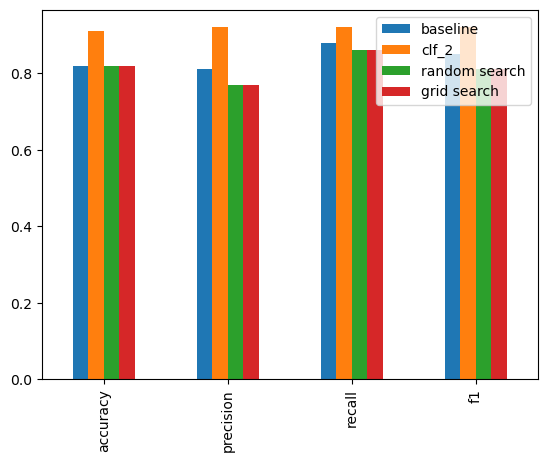

In [20]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar();    # figsize=(10,8)
plt.show()
# So this  is the kind of communication i don not only for myself but for my teammates, or if i'm reporting someone in a project, is to show them
# the different models that you've tried and then show how they perform differently on different classification metrics

In [45]:
# the first model that i a make is more than likely not the best model that i will have, it's a baseline model and it can be
# improved upon and so built a model.

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**\
The pickle module implements binary protocols for serializing and de-serializing a Python object
structure.

In [22]:
import pickle

# Save and existing model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))

# we need to use the open function to deal with input and output files
# because we're writting a file we pass the argument wb that means write binary

In [23]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl","rb"))
# because we're reading a file we pass the argument rb that means read binary

In [24]:
# Make some predictions
# the way to check it, to see if this model actually work, if we saved it and we can use it to make predictions.
pickle_y_preds = loaded_pickle_model.predict(X_test)
# predict on the test data set
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [25]:
# That means our saving our model and re importing it, so loading it in has worked correctly

**joblib**\
In the specific case of the scikit, it may be more interesting to use joblib’s replacement of pickle (joblib.dump & joblib.load), which is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators (a.k.a gs_clf)

In [26]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib") 
# we're going the save the GridSearch_Classifier

['gs_random_forest_model_1.joblib']

In [28]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [30]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [ ]:
# https://scikit-learn.org/0.18/modules/model_persistence.html
# the main advantaje of saving a model: After training a scikit-learn model, it is desirable 
# to have a way to persist the model for future use without having to retrain.

## 7. Putting it all together!

Let's use our car sales regression problem a.k.a predicting the sale price of cars, we'll use that as an example\
and to tidy things up, we're going to be using Scikit-Learn pipeline.. to tidy things up we're going to be using\
the pipeline class.

Now, you can imagine a Pipeline as being a way to string together a number of different Scikit-Learn processes in one hit,\
so similar to like writing a function. You're getting a couple of different steps and you're putting them together.

Pipeline of transforms with a final estimator.

So transformer or transform is a.k.a transforming data, getting data ready.

and then a final estimator, in Scikit-Learn terms is a Machine Learning model.

In [32]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [33]:
# We want to use these columns (Make, Colour, Odometer (KM), Doors) to predict the price column
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [35]:
# We have to make sure that it's all in numerical format before we can build a machine learning model on it
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
# we have to make sure that there is no missing values. 

We've seen filling data, we've seen converting it, but this time we want to use a pipeline to do so.

So the Scikit-Learn Pipeline's main input is `steps`, which is a list that contains a tuple which has a step name and action to take.

And in our case, our steps are what are our steps?\
Well, first, we need to fill the missing data. And then convert the data to numbers and then build a machine learning model on it.

So let's do it!

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

1 and 2 are preprocessing the data\
3 is modelling the data.

In [9]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)    # we drop the rows which contain missing Price values, so a.k.a missing labels

# Now what we're going to do here is we're going to start to define the different features of the data 
# and the different transformer pipelines that we want to take place on that data.

# What transformations do we need to make? (in our car-sales data frame)
# we need to change our making color into numbers, 
# we need to fill the missing values of all the features columns

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

# So this is where the Pipeline inputs take steps to take, one after the other, as a list of tuples
# Pipeline(steps=[(step_1, 1st_action to take), (step_2, nd_action to take), ..., (step_n, nth_action to take)])

# We are imputting the categorical features ["Make", "Colour"] with the constant value of "missing" string

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])   
# is going to fill the missing values with 4, the mayority of cars have 4 doors

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
]) 
# is going to take the mean value of the odometer column and fill the missing values with the mean

# Setup preprocessing steps (fill missing values, the convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        # (name, transformer_to_use, features_to_use transform)
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])
# ColumnTransformer takes transformers and now this is going to be a list of the transformations we want to do in our data
# and in our case, we have one called Cat, short for categorical. It's going to pass it the categorical_transformer and we want those
# transformations that we've defined up here (fill the values with missit and to onehotencoder, )
# we want those to be perform on the categorical features, make and color

# And finally, i want to finish up using the num transformer ("num"), which is going to take our numeric transformer
# and perform the imputation on the numeric features

# Creating a preprocessing and modelling pipeline (we're puting our preprocessing steps together with the modelling steps
# and because there's multiple steps we'll use a pipeline to combine them)
model = Pipeline(steps=[("preprocessor", preprocessor), 
                        ("model", RandomForestRegressor())])
# the name of this step in the pipeline is "preprocessor"
# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                                                  ['Doors']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Odometer (KM)'])])),
                ('model', RandomForestRegressor())])

In [10]:
model.score(X_train, y_train)

0.8844936048284853

https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html

It's also possible tu use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.

And now, remember, the purpose of using `GridSearchCV` or `RandomizedSearchCV` is to try and find another set of hyperparameters\
and hopefully improve the models' score.

In [14]:
# Use GridSeachCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

# "preprocessor__num"the name of this step in the pipeline is "preprocessor". then it's going to "step into (double _)" num
# So num (our imputer here is numeric_transformer which is also a pipeline, which goes to ("imputer", SimpleImputer(strategy="mean")), 
# and then step into strategy it will reach to "mean"..

# = it's going to say try the imputation strategy of mean, which is what it is now and median

# So we go preprocessor, this one: ("preprocessor", preprocessor)
# we select the field num ("num", numeric_transformer, numeric_features), we go up to num, which is numeric_transformer
# Then we see imputer in ("imputer", SimpleImputer(strategy="mean")), and then we're going to adjust strategy

#  "model__n_estimators" So we only need on double underscore here because we're only going up one level
# this is the same as accessing the model, going to pipeline, then model, then input n_estimators=100 to the RandomForestRegressor() function

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [15]:
gs_model.score(X_test, y_test)

0.2848784564026805